In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/FireSegmentation/FireSeg_masks.npy')

In [3]:
X_test = images[10000:12000]
y_test = masks[10000:12000]

In [4]:
images = images[0:10000]
masks = masks[0:10000]

In [5]:
images.shape

(10000, 512, 512, 1)

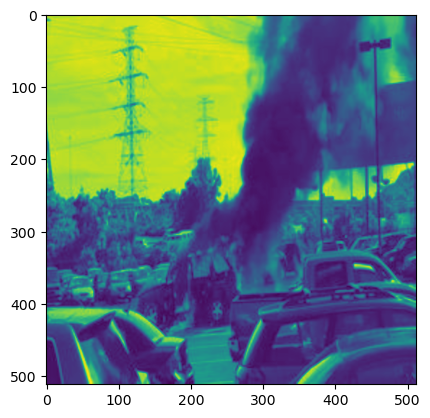

In [6]:
imshow(images[100])

In [7]:
masks.shape

(10000, 512, 512, 1)

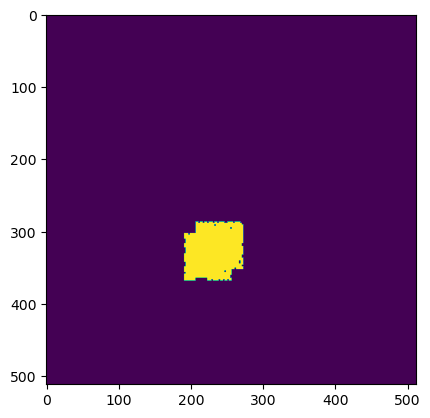

In [8]:
imshow(masks[100])

In [9]:
import sys
sys.path.append('../')
import gp2

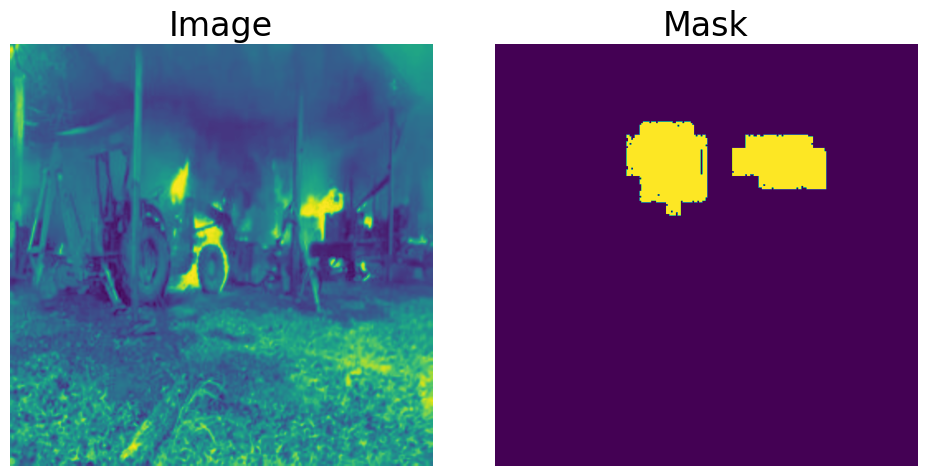

In [12]:
plt.rcParams['font.size'] = 20
gp2.Util.display_image_and_mask(images[1111], masks[1111])

In [10]:
from keras import losses

In [11]:
loss_fx = losses.BCE

In [12]:
C = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpni5iwk9nkuc_unet2d


In [13]:
from runner import Runner
R = Runner(verbose=True, workingdir=C.workingdir)

*** GP2 ***
Working directory: /tmp/tmpni5iwk9nkuc_unet2d
Verbose mode active!


In [14]:
R.classifier = C ### use custom classifier

In [15]:
R.run(images, masks, runs=3, batch_size=16, shuffle=True, results_file='/raid/mpsych/OMAMA/GP2/results/kuc_unet2d_0kuc_unet2d_model_1_3_fireseg.pkl')

Shuffling data...
Weights OK!
******
Loop 1
Epoch 1/100
32/32 [==============================] - 33s 725ms/step - loss: 0.0380 - dice_coeff: 0.6799 - val_loss: 0.0364 - val_dice_coeff: 0.7131
Epoch 2/100
32/32 [==============================] - 15s 478ms/step - loss: 0.0286 - dice_coeff: 0.7499 - val_loss: 0.0337 - val_dice_coeff: 0.7232
Epoch 3/100
32/32 [==============================] - 15s 482ms/step - loss: 0.0261 - dice_coeff: 0.7680 - val_loss: 0.0356 - val_dice_coeff: 0.7463
Epoch 4/100
32/32 [==============================] - 15s 480ms/step - loss: 0.0233 - dice_coeff: 0.7966 - val_loss: 0.0359 - val_dice_coeff: 0.7472
Epoch 5/100
32/32 [==============================] - 15s 480ms/step - loss: 0.0208 - dice_coeff: 0.8163 - val_loss: 0.0380 - val_dice_coeff: 0.7547
Epoch 6/100
32/32 [==============================] - 15s 481ms/step - loss: 0.0192 - dice_coeff: 0.8321 - val_loss: 0.0392 - val_dice_coeff: 0.7541
Epoch 7/100
32/32 [==============================] - 15s 481ms/step 

In [16]:
R.classifier_scores

[[0.040418870747089386, 0.749854326248169],
 [0.050081897526979446, 0.7187634706497192],
 [0.060566529631614685, 0.7486075758934021]]

In [17]:
R.discriminator_scores

[[0.00118284672498703, 1.0],
 [5.106085609440925e-06, 1.0],
 [0.0010011389385908842, 1.0]]

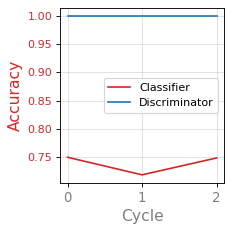

In [18]:
R.plot()

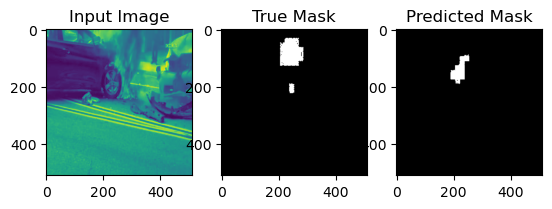

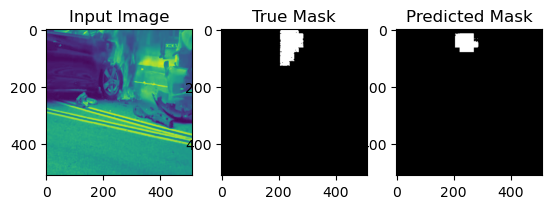

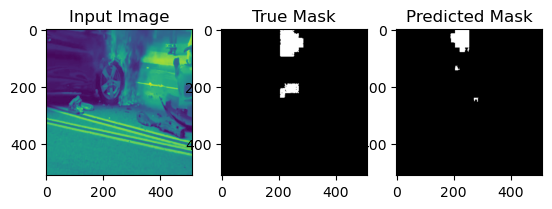

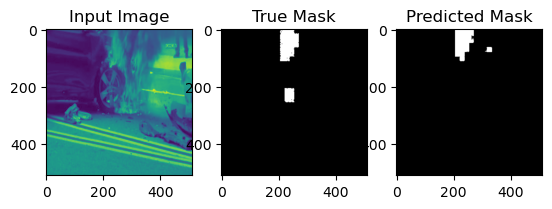

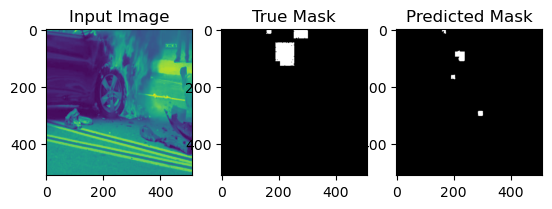

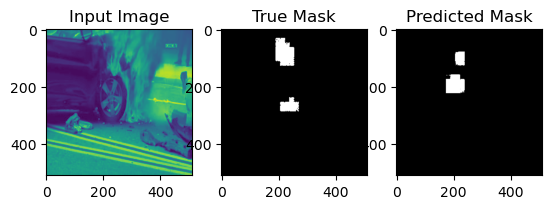

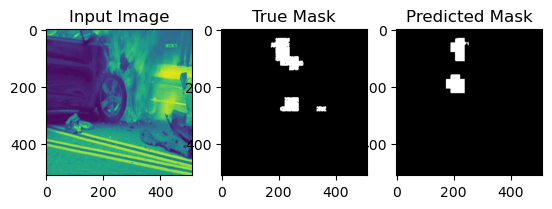

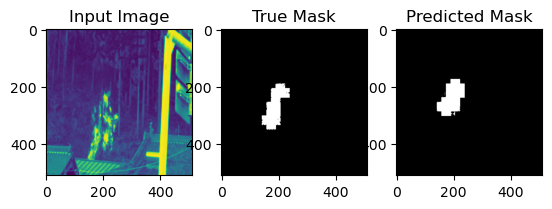

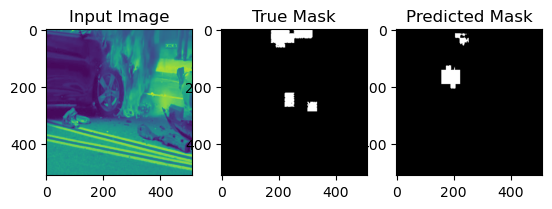

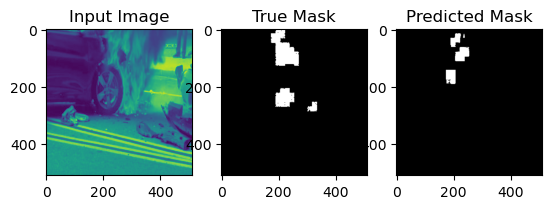

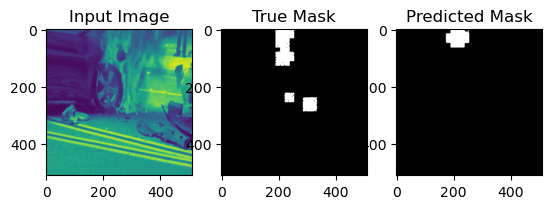

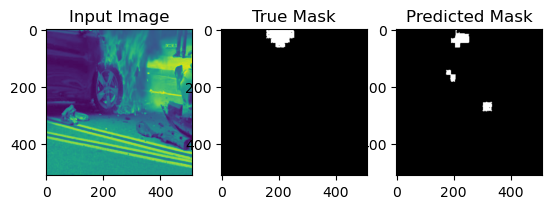

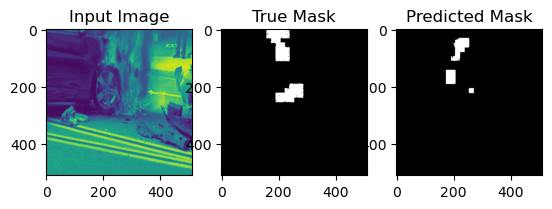

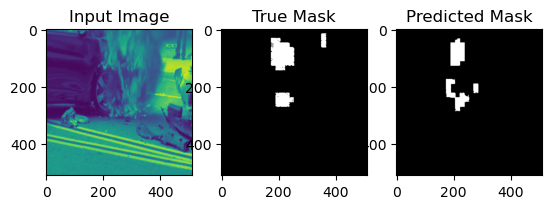

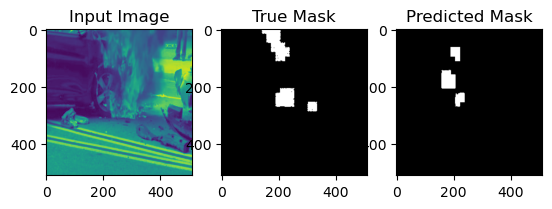

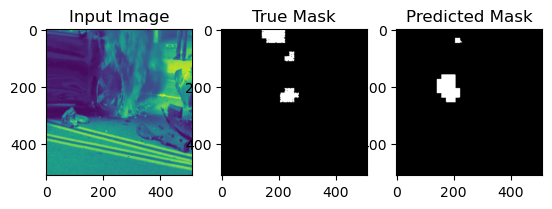

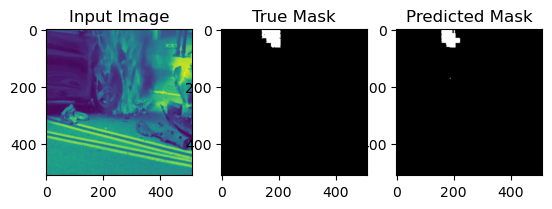

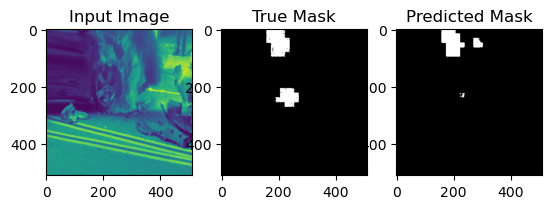

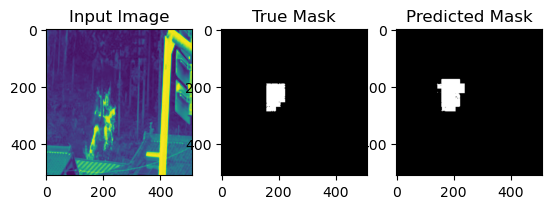

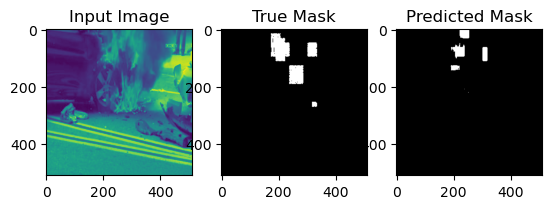

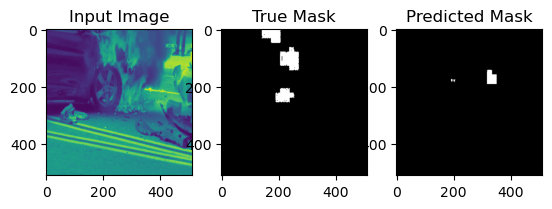

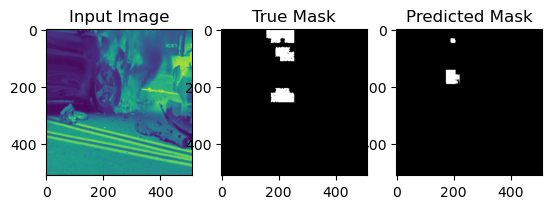

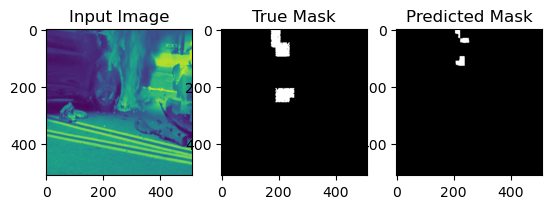

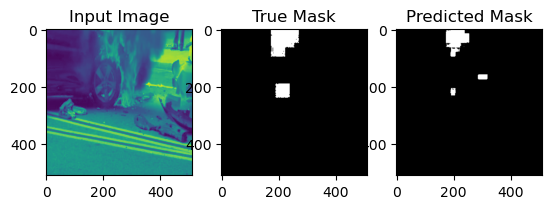

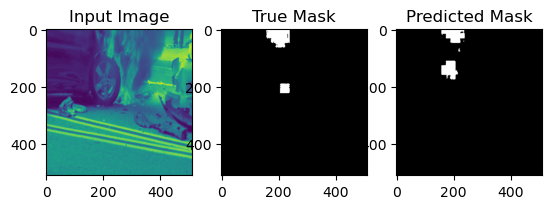

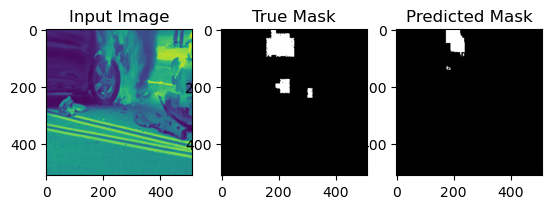

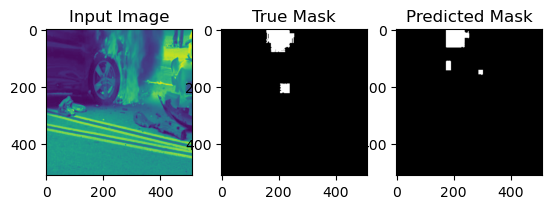

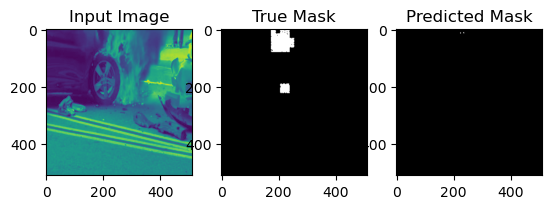

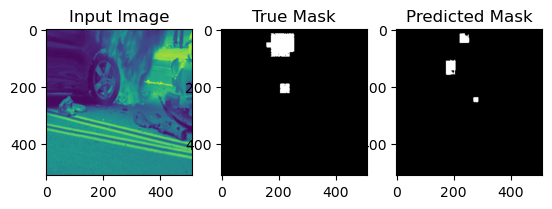

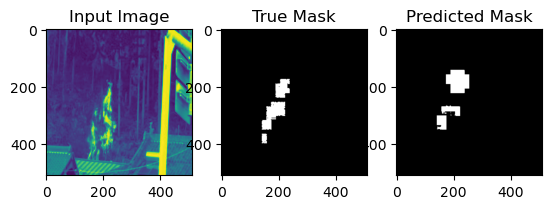

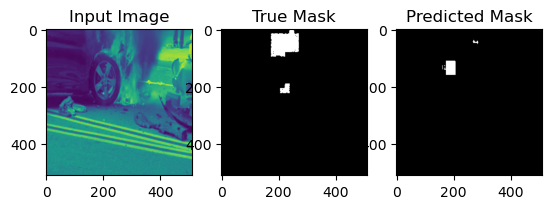

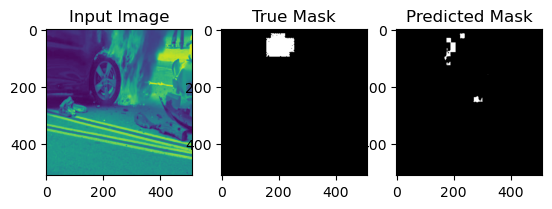

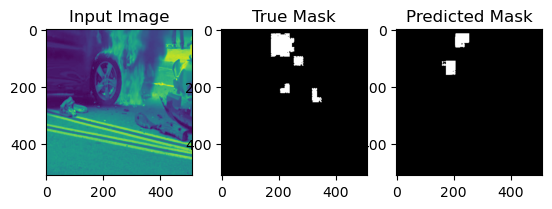

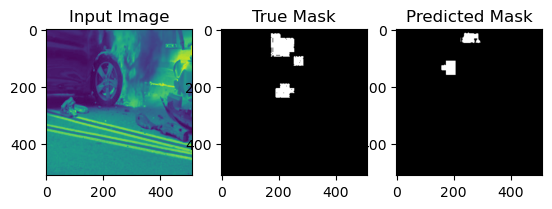

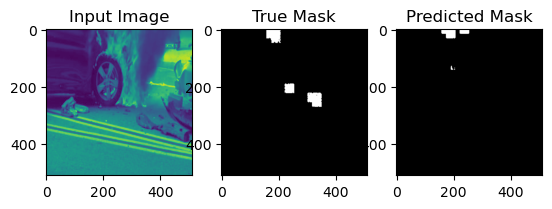

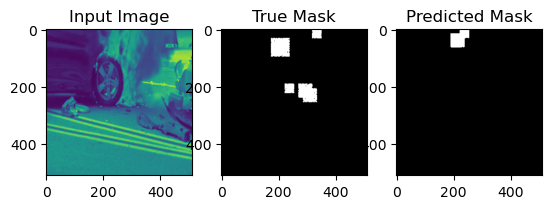

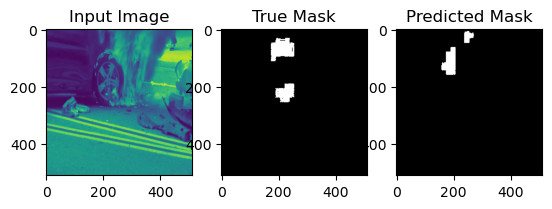

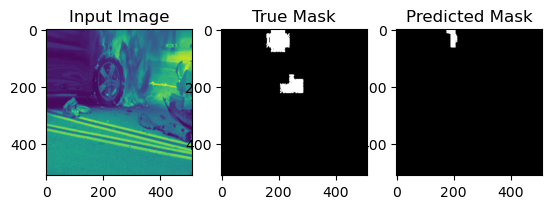

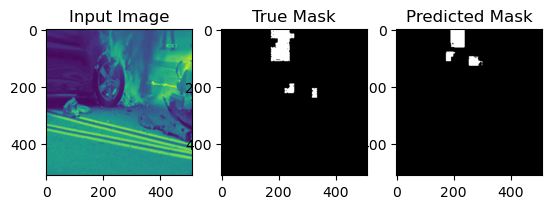

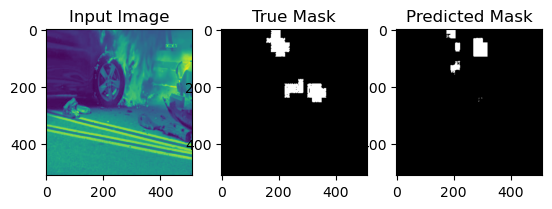

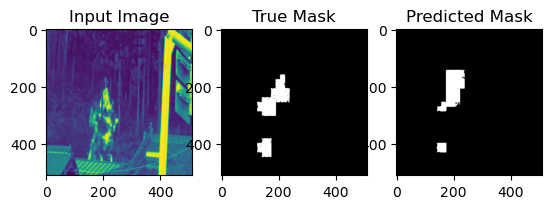

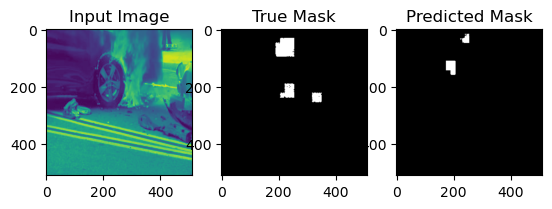

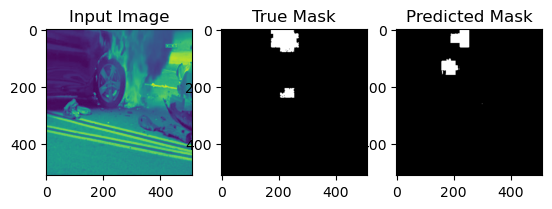

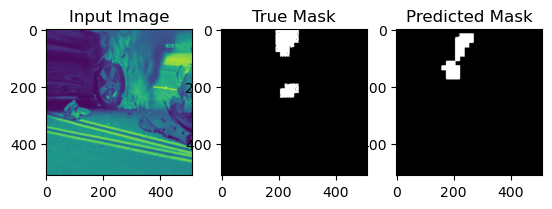

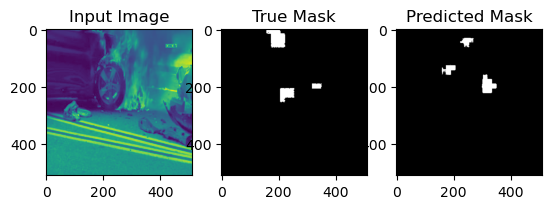

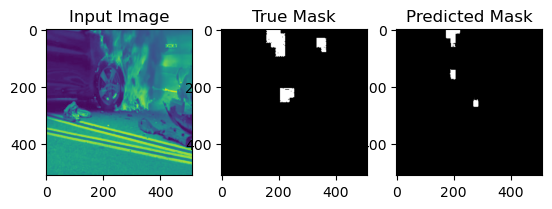

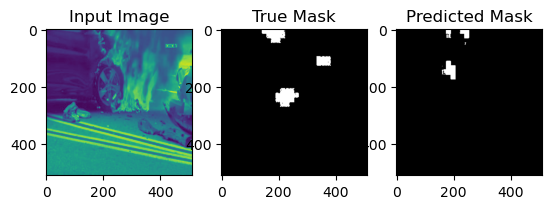

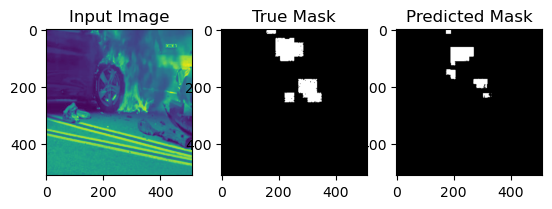

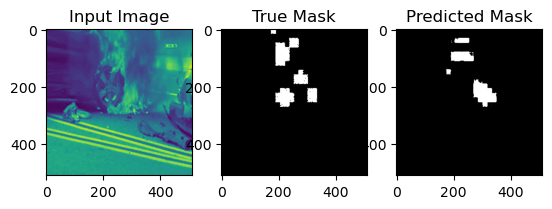

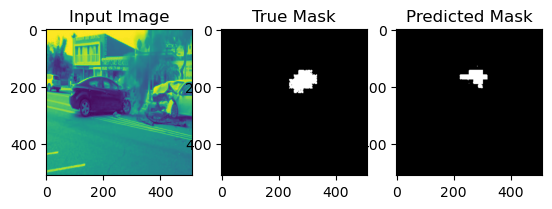

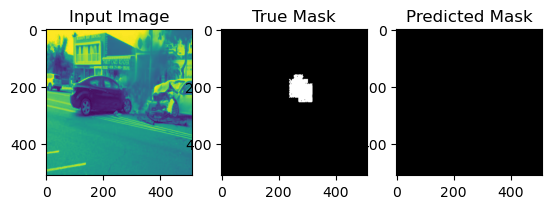

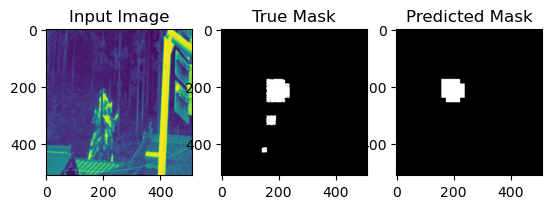

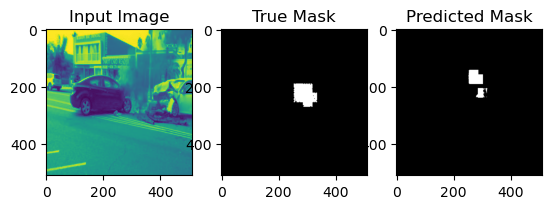

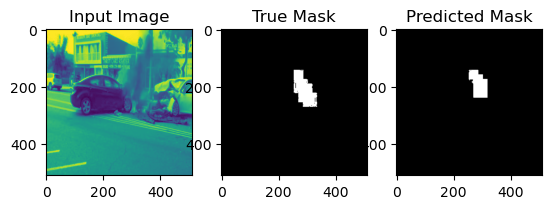

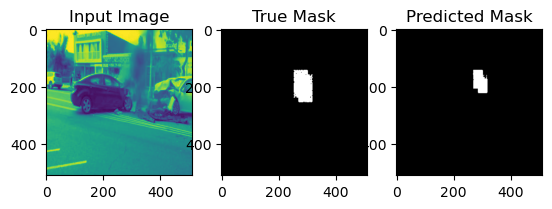

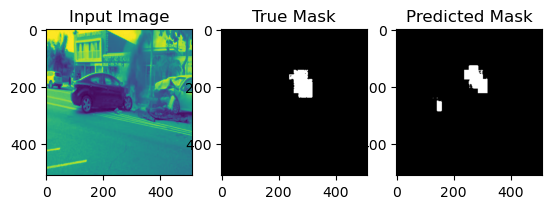

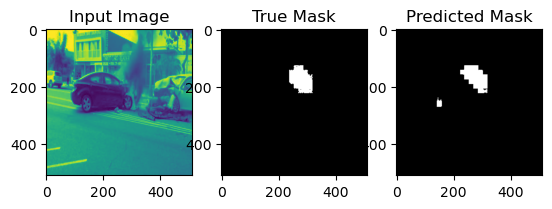

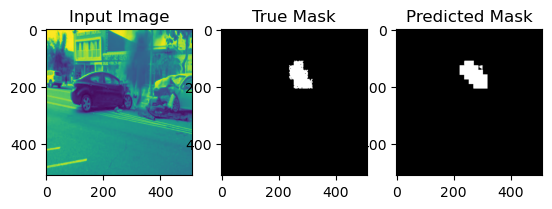

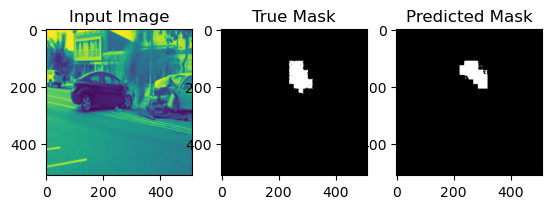

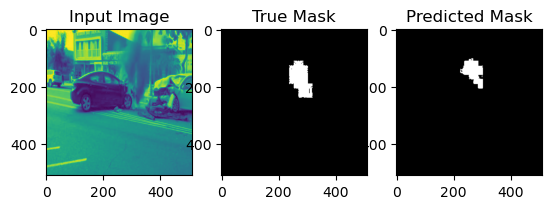

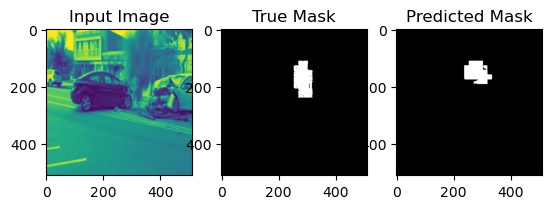

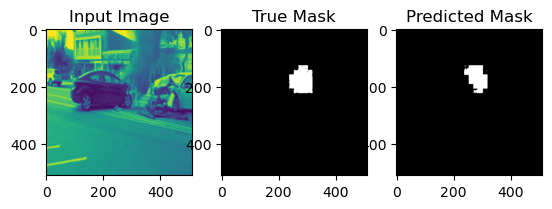

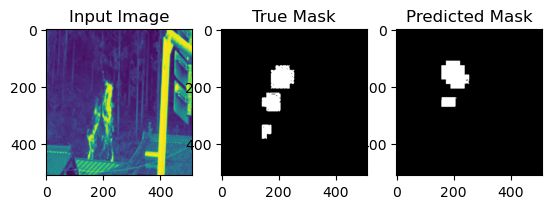

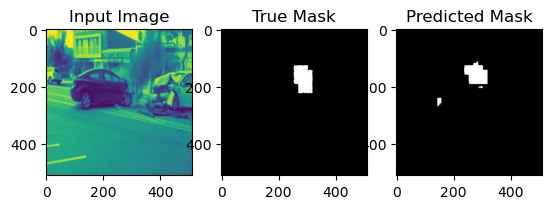

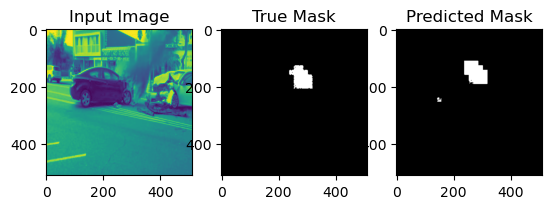

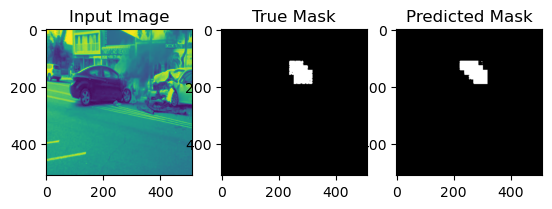

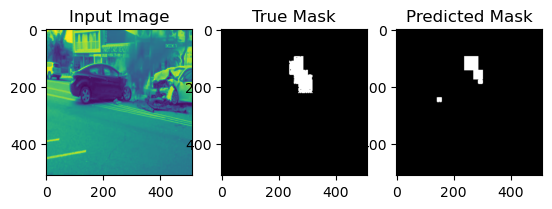

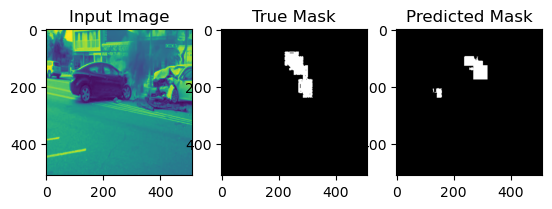

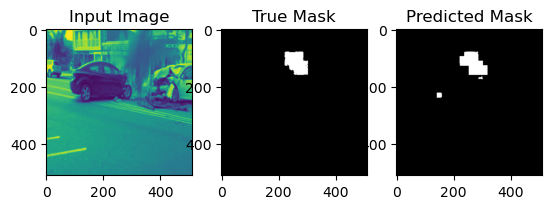

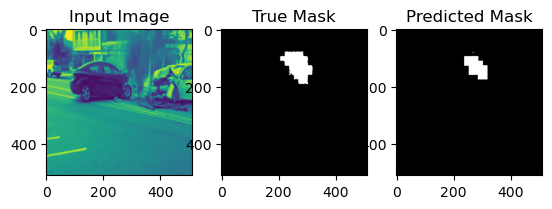

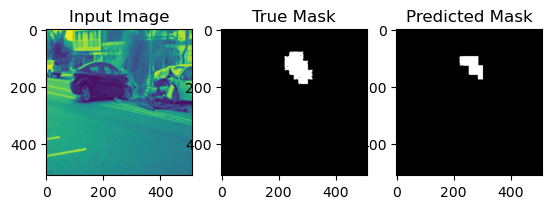

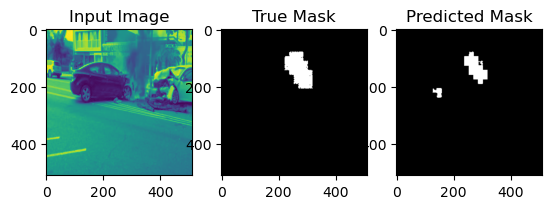

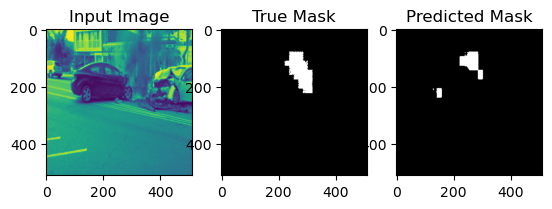

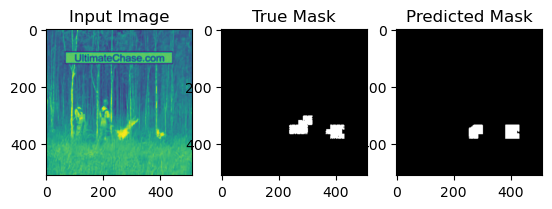

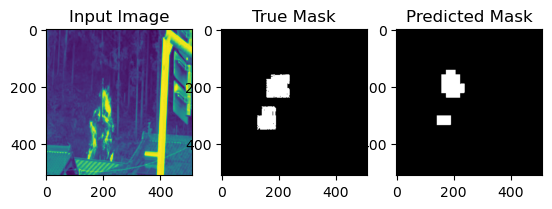

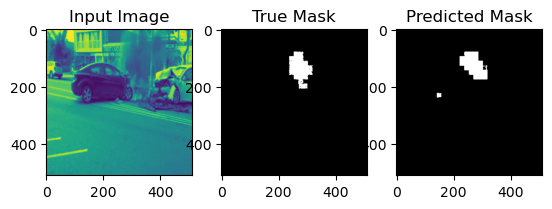

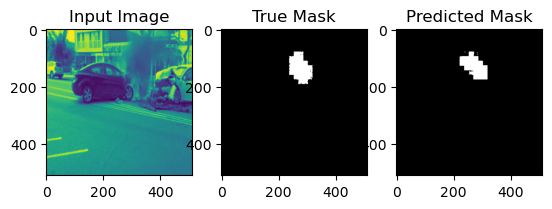

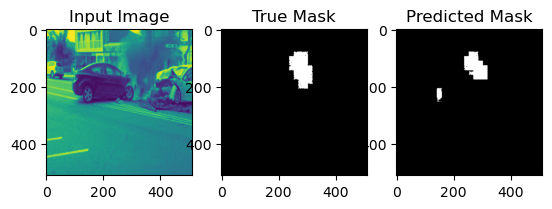

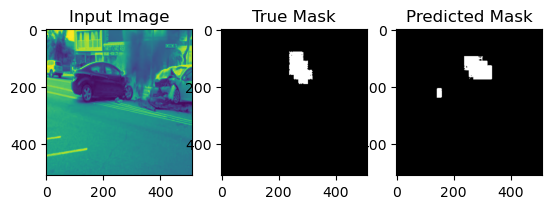

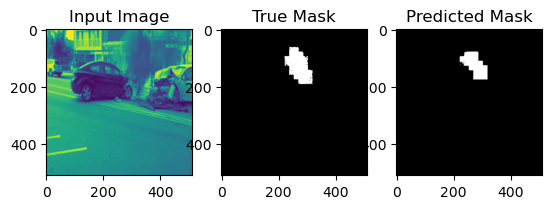

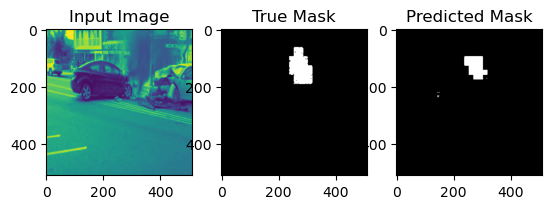

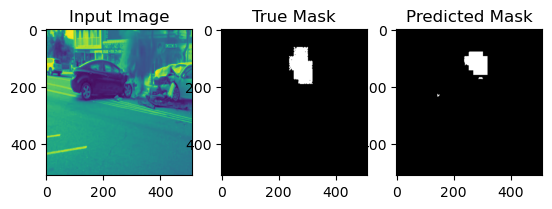

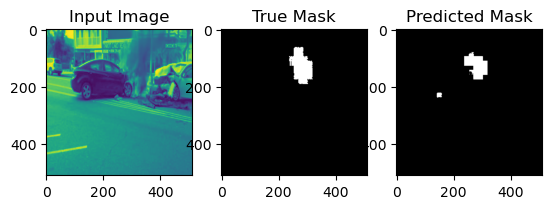

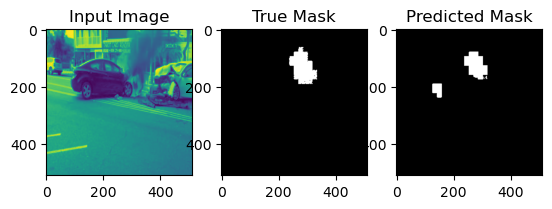

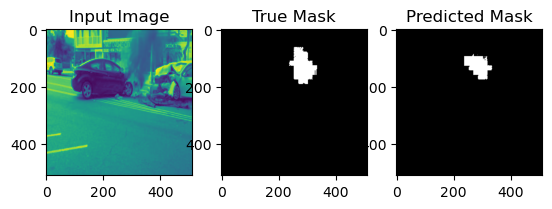

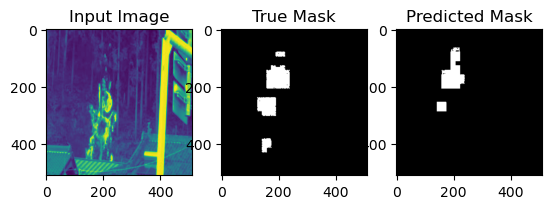

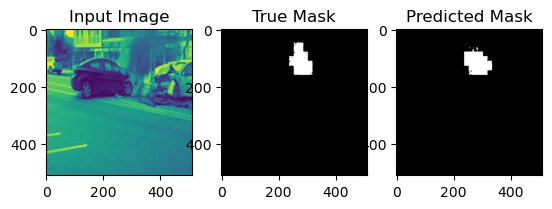

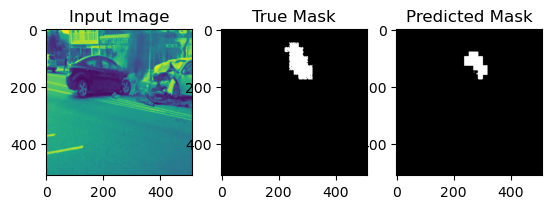

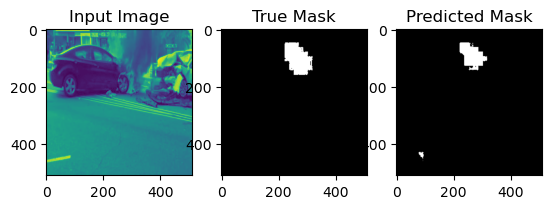

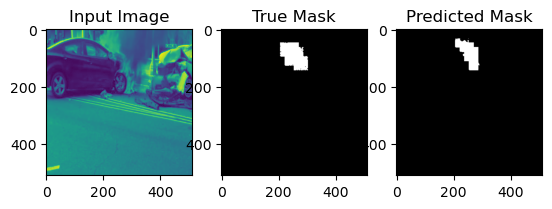

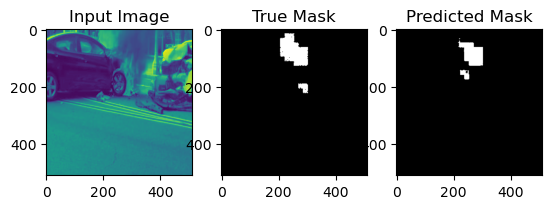

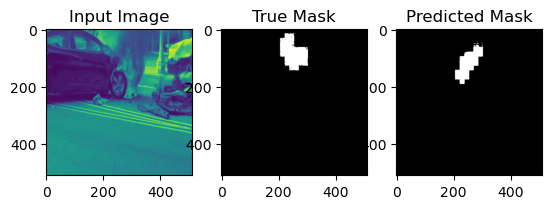

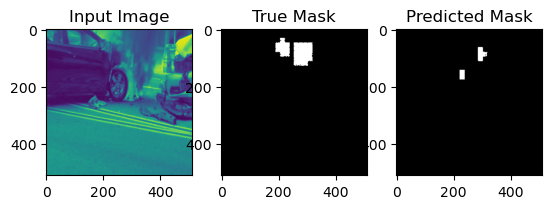

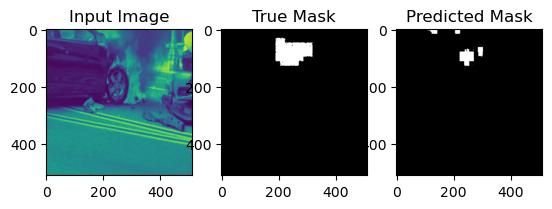

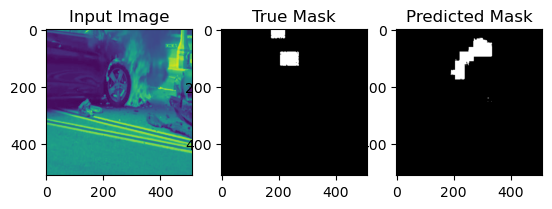

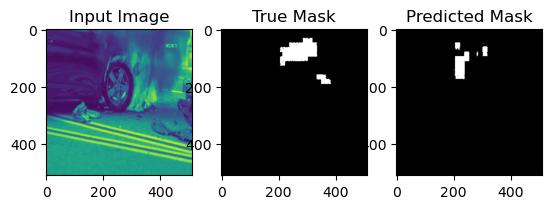

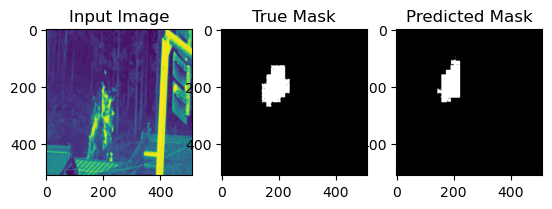

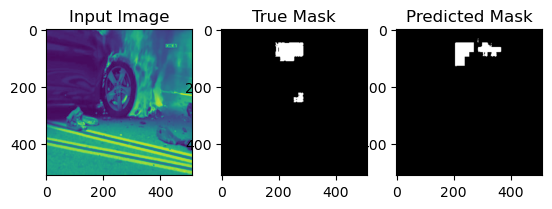

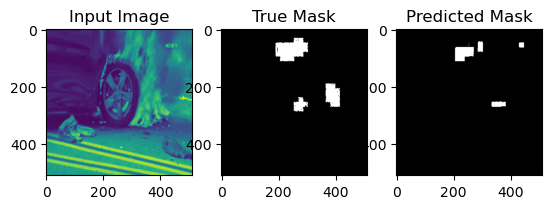

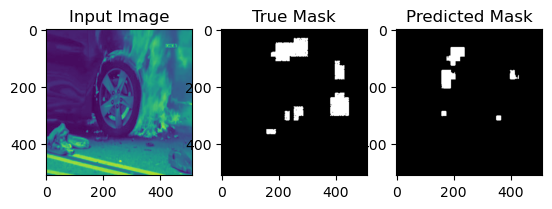

In [19]:
gp2.Util.visualize_predictions(C, X_test, y_test, num_samples=100)

In [20]:
y_pred = R.classifier.predict(X_test, y_test)

In [21]:
y_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [22]:
BareBone = gp2.KUC_UNet2D(loss=loss_fx, model_path='/tmp/tmpx71z76e4kuc_unet2d/kuc_unet2d_0kuc_unet2d_model')

*** GP2  KUC U-Net2D ***
Working directory: /tmp/tmpni5iwk9nkuc_unet2d


In [23]:
barebone_pred = BareBone.predict(X_test, y_test)

In [24]:
barebone_pred

(array([[[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         ...,
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]]],
 
 
        [[[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
          [0.],
          [0.],
          [0.]],
 
         [[0.],
          [0.],
          [0.],
          ...,
      

In [25]:
BareBone.model.metrics_names

['loss', 'dice_coeff']